In [2]:
# importar os pacotes necessários

import os
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn import tree
from sklearn.cluster import KMeans
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import ClusterCentroids
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score


In [3]:
file_path = "creditcard.csv"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

In [4]:
# Ver as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Visualizar o tamanho do dataframe
print("Entradas: ", df.shape[0])
print("Variáveis: ", df.shape[1])

Entradas:  284807
Variáveis:  31


In [6]:
# Extrair o nome das colunas
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# Extrair o tipo das variáveis
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
# Porcentagem de itens nulos
(df.isnull().sum()/df.shape[0]).sort_values(ascending = True) * 100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [9]:
# Quantidade de dados distribuidos por classes
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
# Porcentagem de dados distribuidos por classes
round(df.Class.value_counts()/df.shape[0] * 100,4)

Class
0    99.8273
1     0.1727
Name: count, dtype: float64

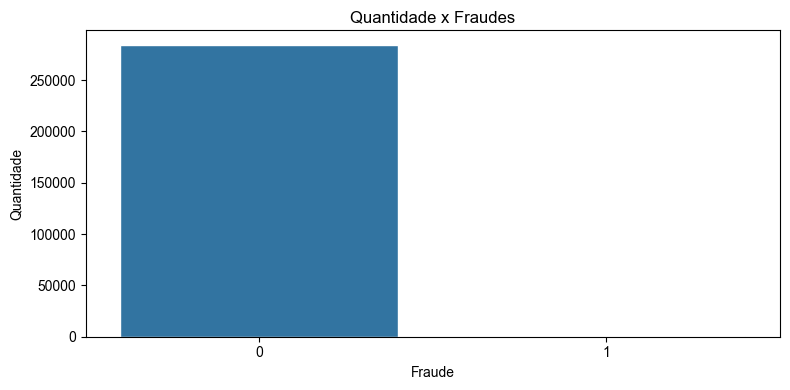

In [11]:
# Plotar um gráfico de barras para ver o balanceamento do *dataset*
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(sns.dark_palette("xkcd:golden", 8))
count = df['Class'].value_counts()
sns.countplot(x='Class', data=df)
ax.set_xlabel('Fraude')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade x Fraudes');
plt.tight_layout()


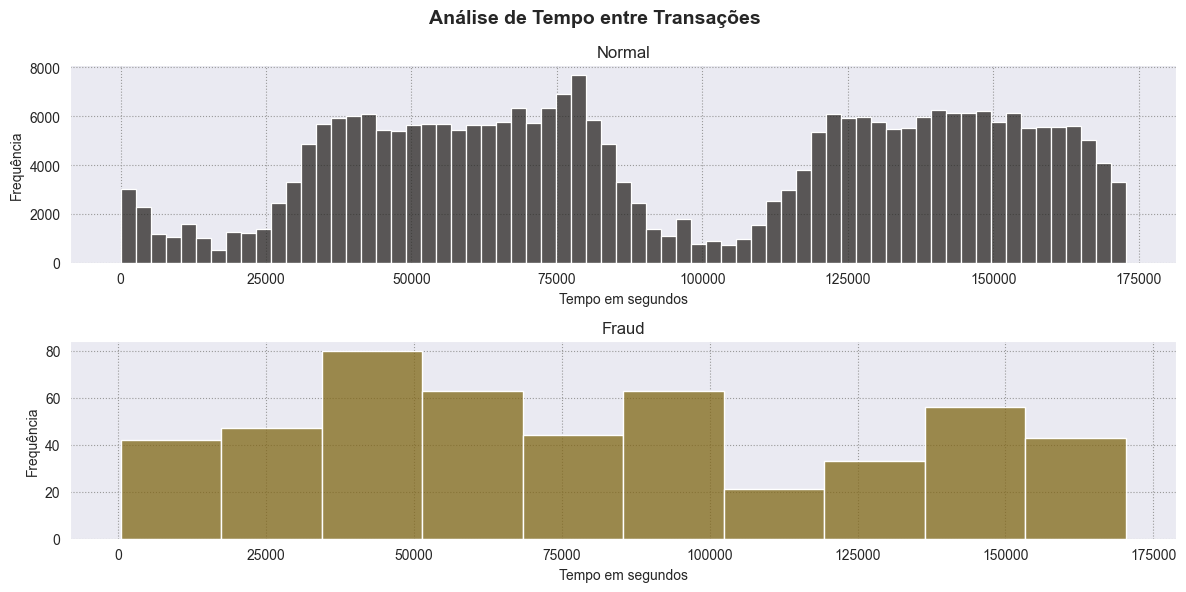

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(sns.dark_palette("xkcd:golden", 8))
sns.histplot(data=df.Time.loc[df.Class == 0], kde=False, ax = ax[0], color=sns.color_palette()[0])
sns.histplot(data=df.Time.loc[df.Class == 1], kde=False, ax = ax[1], color=sns.color_palette()[3])
ax[0].set_xlabel('Tempo em segundos')
ax[0].set_ylabel('Frequência')
ax[0].set_title('Normal');

ax[1].set_xlabel('Tempo em segundos')
ax[1].set_ylabel('Frequência')
ax[1].set_title('Fraud');

fig.suptitle("Análise de Tempo entre Transações", fontsize=14, fontweight='bold')
plt.tight_layout()

In [13]:
# Não há fraudes
df.Time.loc[df.Class == 0].describe()

count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

In [14]:
# Há fraudes
df.Time.loc[df.Class == 1].describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

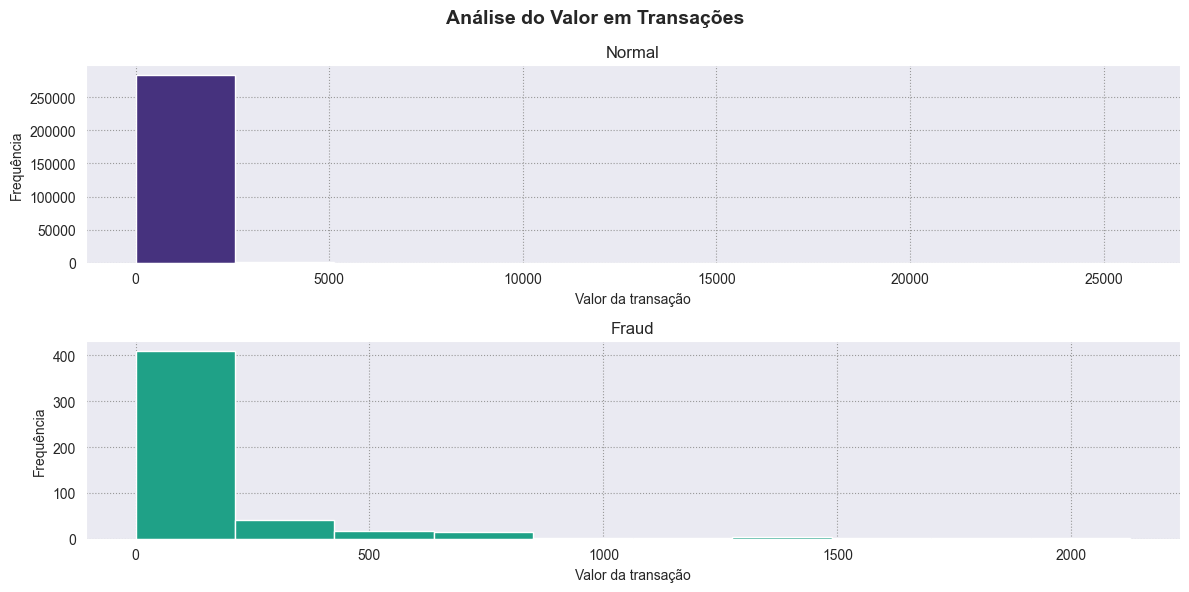

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

ax[0].hist(df.Amount[df.Class == 0], color=sns.color_palette("viridis")[0])
ax[0].set_title('Normal')

ax[1].hist(df.Amount[df.Class == 1], color=sns.color_palette("viridis")[3])
ax[1].set_title('Fraud')

ax[0].set_xlabel('Valor da transação')
ax[0].set_ylabel('Frequência')

ax[1].set_xlabel('Valor da transação')
ax[1].set_ylabel('Frequência')

fig.suptitle("Análise do Valor em Transações", fontsize=14, fontweight='bold')
plt.tight_layout()


In [16]:
# Não há fraudes
df.Amount[df.Class == 0].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [17]:
# Há fraudes
df.Amount[df.Class == 1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

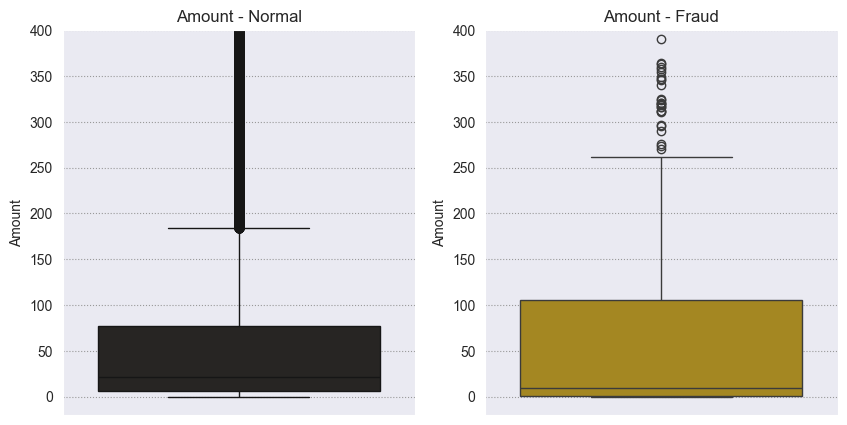

In [18]:
# verificar o conjunto de dados original
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette(sns.dark_palette("xkcd:golden", 8))
sns.boxplot(data=df.loc[df.Class == 0], y='Amount', ax=ax[0], color=sns.color_palette()[0])
sns.boxplot(data=df.loc[df.Class == 1], y='Amount', ax=ax[1], color=sns.color_palette()[5])
ax[0].set_title('Amount - Normal')
ax[1].set_title('Amount - Fraud')
ax[0].set_ylim(-20, 400)
ax[1].set_ylim(-20, 400)
plt.show()

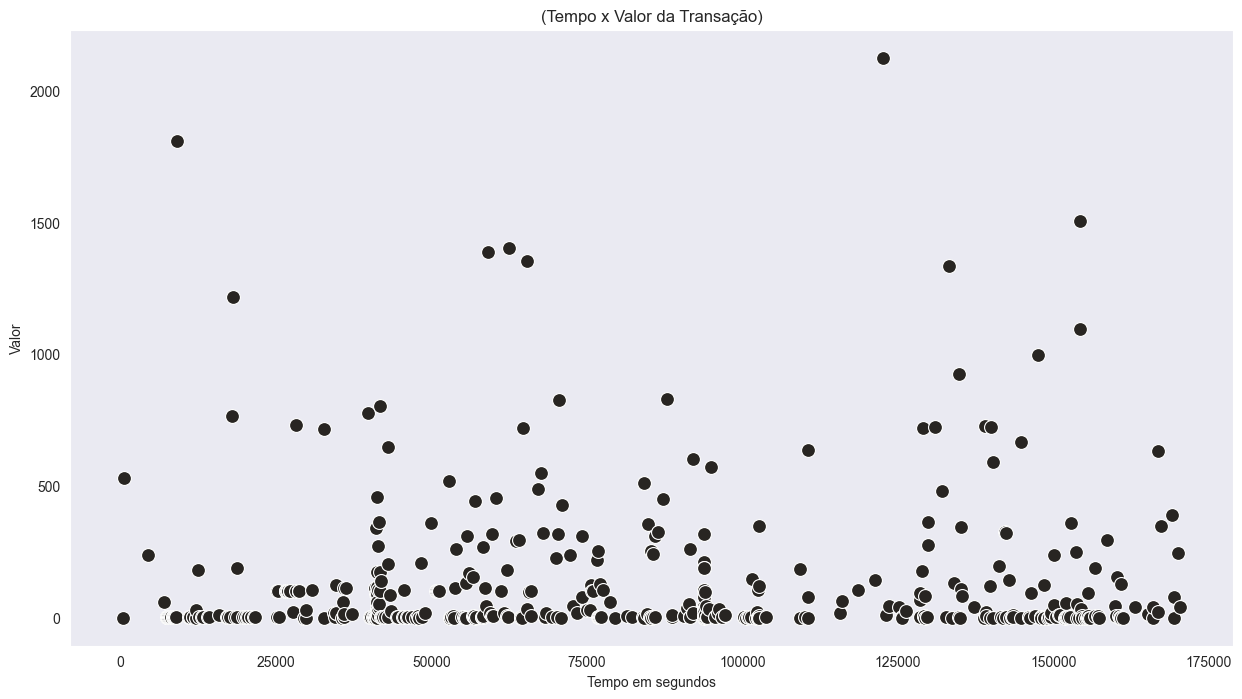

In [19]:
fig = plt.gcf()

fig.set_size_inches(15, 8)

ax = sns.scatterplot(data=df.loc[df.Class == 1], x="Time", y="Amount", s = 100)
ax.set(xlabel='Tempo em segundos', ylabel='Valor')
ax.set_title("(Tempo x Valor da Transação)")
ax.grid(False)

plt.show()

In [20]:
# criar uma matriz de correlação
corr_df = df[['Time', 'Amount']].corr(method='pearson');

# mostrar a matriz de correlação
display(corr_df);

,Time,Amount
Time,1.000000,-0.010596
Amount,-0.010596,1.000000


In [21]:
# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# verificando o conjunto
print(test.shape)
test.head()

(42721, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0


In [22]:
# drop das linhas de teste
df = df.drop(test.index)

# verificando o shape do df
df.shape

(242086, 31)

In [23]:
# resetando o index dos conjuntos
df.reset_index()
test.reset_index()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00,0
1,255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98,0
2,244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00,0
3,63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00,0
4,11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42716,229333,145885.0,-0.330429,0.587057,0.635175,-0.619929,0.690199,-1.146289,0.914373,-0.158436,...,-0.172181,-0.540837,0.047329,-0.037745,-0.671478,0.119750,0.094611,0.173363,1.29,0
42717,189242,128317.0,-17.015895,-18.501723,-2.965763,5.989228,7.811563,-4.440128,-1.905238,-1.938201,...,-5.414098,3.688960,11.360879,0.771200,2.274458,1.954516,6.507171,-4.075417,6.37,0
42718,232656,147253.0,0.044490,0.898231,0.306854,-0.587229,0.441139,-1.121860,1.039291,-0.231897,...,-0.255365,-0.535225,0.064659,0.050984,-0.476387,0.136342,0.250095,0.098383,2.69,0
42719,174418,121905.0,1.945191,-0.273317,-0.126410,0.436141,-0.841361,-1.026928,-0.323962,-0.216008,...,-0.211303,-0.481833,0.466048,0.482353,-0.668233,0.198535,-0.033724,-0.033819,23.99,0


In [24]:
# padronizar as colunas Time e Amount
df_clean = df.copy()
std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


In [25]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df_clean['Class'] # variável alvo

# dividir o dataset entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size = 0.15)

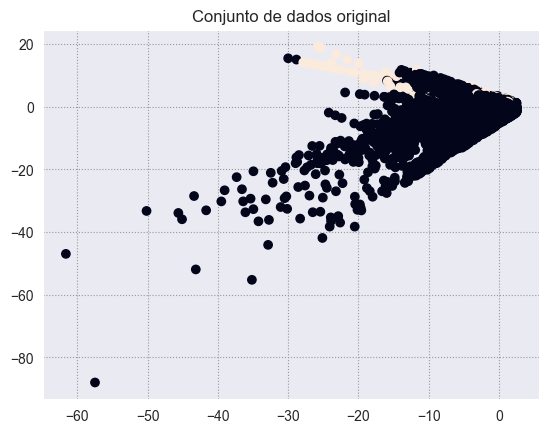

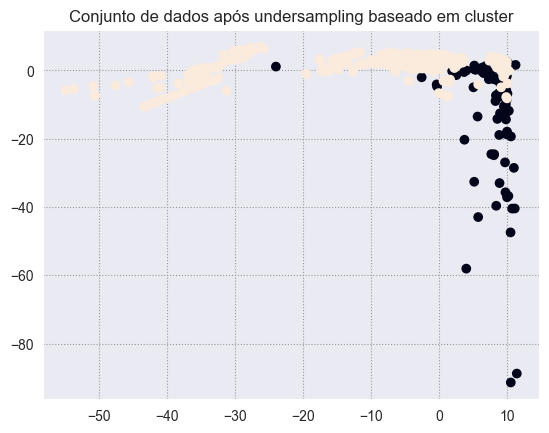

In [26]:
# Aplica a redução de dimensionalidade PCA para deixar o X_train em duas dimensões
pca = PCA(2)
X_train_vis = pca.fit_transform(X_train)

# Exibindo o conjunto de dados original
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train)
plt.title('Conjunto de dados original')
plt.show()

# Cria um objeto ClusterCentroids
cc = ClusterCentroids(sampling_strategy='auto', random_state=10)

# Aplica undersampling baseado em cluster
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

# Aplicando PCA para visualizar o conjunto de dados em 2 dimensões após o undersampling
X_resampled_vis = pca.fit_transform(X_resampled)

# Exibindo o conjunto de dados após o undersampling
plt.scatter(X_resampled_vis[:, 0], X_resampled_vis[:, 1], c=y_resampled)
plt.title('Conjunto de dados após undersampling baseado em cluster')
plt.show()

In [27]:
# Visualizando o tamanho do conjunto de treinamento
print("Tamanho do y_train:", np.shape(y_train))

# Visualizando o tamanho do conjunto balanceado
print("Tamanho do y_resampled:", np.shape(y_resampled))

Tamanho do y_train: (205773,)
Tamanho do y_resampled: (710,)


In [28]:
# ver o balanceamento das classes
print(pd.Series(y_resampled).value_counts())

Class
0    355
1    355
Name: count, dtype: int64


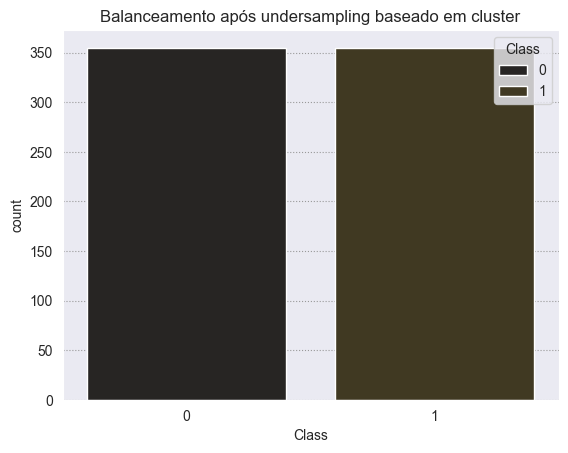

In [29]:
# plotar a nova distribuição de classes
sns.set_palette(sns.dark_palette("xkcd:golden", 8))
sns.countplot(x=y_resampled, hue=y_resampled);
plt.title('Balanceamento após undersampling baseado em cluster')
plt.show();

In [30]:
# Criando uma instância do SMOTE
smote = SMOTE()

# Balanceando os dados
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

In [31]:
# Visualizando o tamanho do conjunto de treinamento
print("Tamanho do y_train:", np.shape(y_train))

# Visualizando o tamanho do conjunto balanceado
print("Tamanho do y_resampled:", np.shape(y_resampled_smote))

Tamanho do y_train: (205773,)
Tamanho do y_resampled: (410836,)


In [32]:
# ver o balanceamento das classes
print(pd.Series(y_resampled_smote).value_counts())

Class
0    205418
1    205418
Name: count, dtype: int64


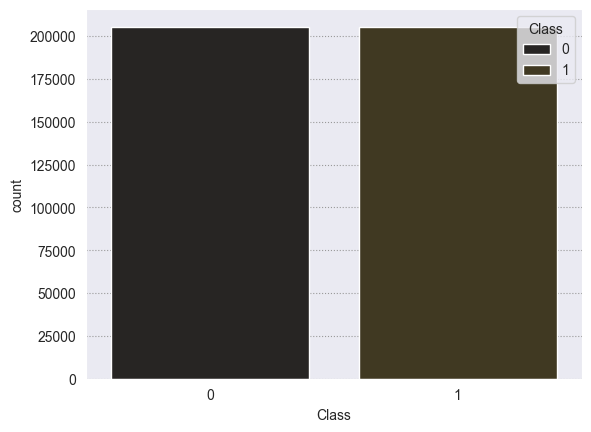

In [33]:
# plotar a nova distribuição de classes
sns.set_palette(sns.dark_palette("xkcd:golden", 8))
sns.countplot(x=y_resampled_smote, hue=y_resampled_smote);

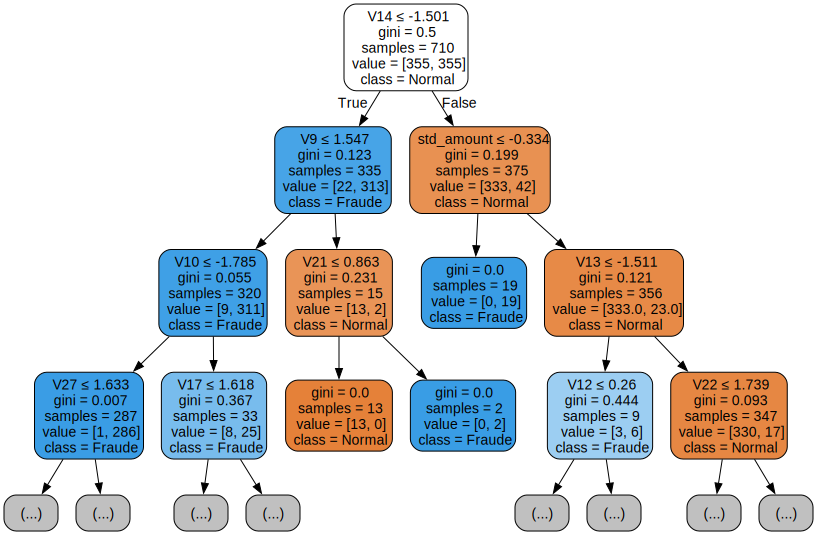

In [34]:
# Cria um objeto DecisionTreeClassifier, que retorna um Estimator
clf = tree.DecisionTreeClassifier()

# Realiza o aprendizado de máquina
clf = clf.fit(X_resampled, y_resampled)

# Definindo o caminho para o Graphviz (opcional, já que o Graphviz está no PATH)
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

# Cria um objeto DecisionTreeClassifier, que retorna um Estimator
clf = tree.DecisionTreeClassifier()

# Realiza o aprendizado de máquina
clf = clf.fit(X_resampled, y_resampled)

dot_data = export_graphviz(clf, out_file=None, feature_names=X_resampled.columns,
                           class_names=['Normal', 'Fraude'], filled=True, rounded=True,
                           max_depth=3, special_characters=True)

# Criando um objeto Graph a partir do arquivo .dot
graph = graphviz.Source(dot_data)

# Exibindo a árvore de decisão no notebook
display(graph)

In [35]:
# fazer as previsões em cima dos dados de validação
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

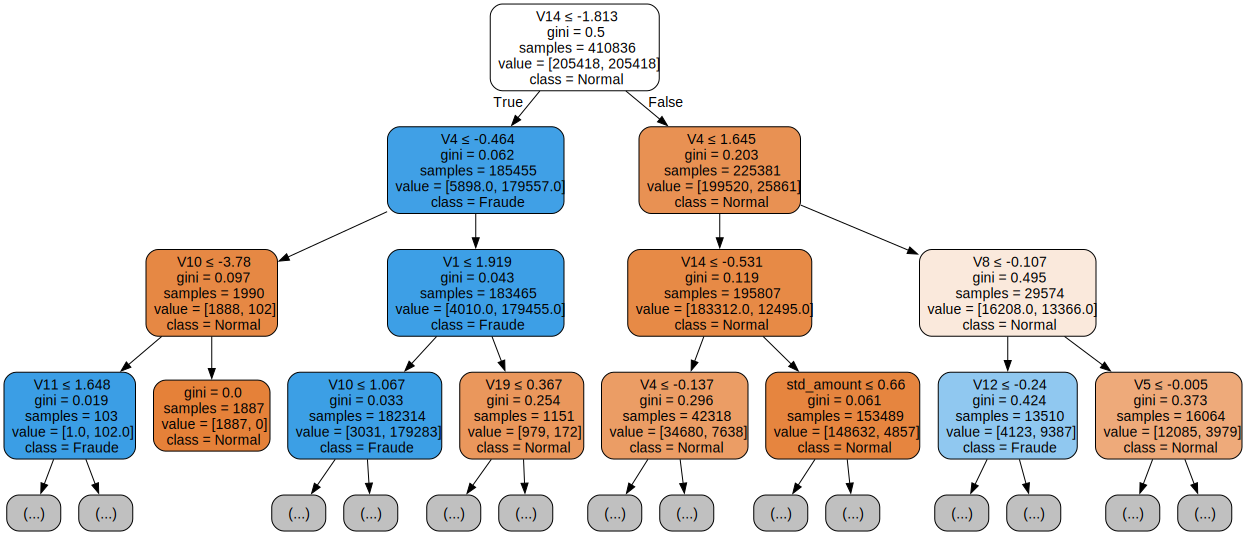

In [36]:
# Cria um objeto DecisionTreeClassifier, que retorna um Estimator
clf_smote = tree.DecisionTreeClassifier()

# Realiza o aprendizado de máquina
clf_smote = clf_smote.fit(X_resampled_smote, y_resampled_smote)

# Definindo o caminho para o Graphviz
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

dot_data = export_graphviz(clf_smote, out_file=None, feature_names=X_resampled_smote.columns,
                           class_names=['Normal', 'Fraude'], filled=True, rounded=True,
                           max_depth = 3, special_characters=True)

# Criando um objeto Graph a partir do arquivo .dot
graph = graphviz.Source(dot_data)

# Exibindo a árvore de decisão no notebook
display(graph)

In [37]:
# fazer as previsões em cima dos dados de validação
y_pred_smote = clf_smote.predict(X_test)
y_prob_smote = clf_smote.predict_proba(X_test)

In [38]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_resampled, y_resampled);

In [39]:
# fazer as previsões em cima dos dados de validação
y_pred_lr = model.predict(X_test)
y_proba_lr = model.predict_proba(X_test)

In [40]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model_smote = LogisticRegression()
model_smote.fit(X_resampled_smote, y_resampled_smote);

In [41]:
# fazer as previsões em cima dos dados de validação
y_pred_lr_smote = model_smote.predict(X_test)
y_proba_lr_smote = model_smote.predict_proba(X_test)

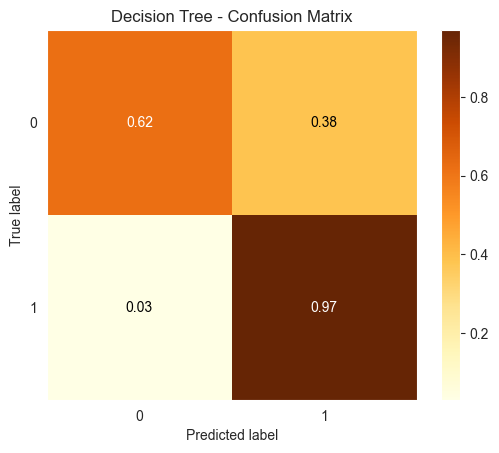

In [42]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap = 'YlOrBr')
plt.title("Decision Tree - Confusion Matrix");

In [43]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.6184    0.7642     36250
           1     0.0044    0.9683    0.0087        63

    accuracy                         0.6190     36313
   macro avg     0.5022    0.7933    0.3865     36313
weighted avg     0.9982    0.6190    0.7629     36313

Acurácia: 0.6190

AUC: 0.7933



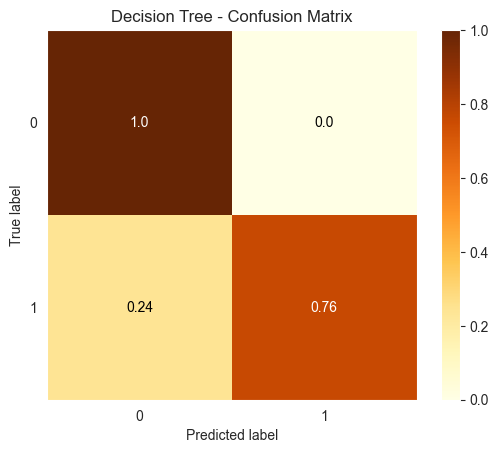

In [44]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_smote, normalize=True, cmap = 'YlOrBr')
plt.title("Decision Tree - Confusion Matrix");

In [45]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_smote, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_smote)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_smote)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9996    0.9978    0.9987     36250
           1     0.3810    0.7619    0.5079        63

    accuracy                         0.9974     36313
   macro avg     0.6903    0.8799    0.7533     36313
weighted avg     0.9985    0.9974    0.9979     36313

Acurácia: 0.9974

AUC: 0.8799



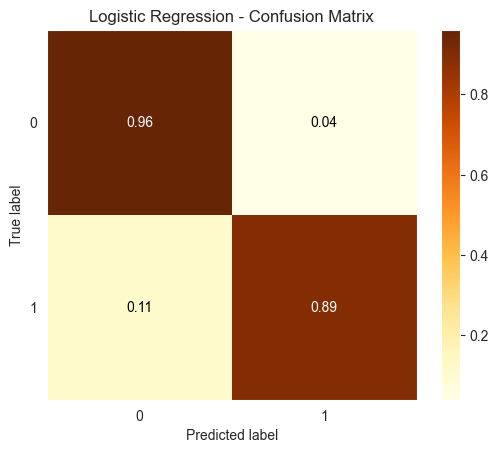

In [46]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr, normalize=True, cmap = 'YlOrBr')
plt.title("Logistic Regression - Confusion Matrix");

In [47]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lr, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_lr)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_lr)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9646    0.9819     36250
           1     0.0418    0.8889    0.0798        63

    accuracy                         0.9644     36313
   macro avg     0.5208    0.9267    0.5309     36313
weighted avg     0.9981    0.9644    0.9803     36313

Acurácia: 0.9644

AUC: 0.9267



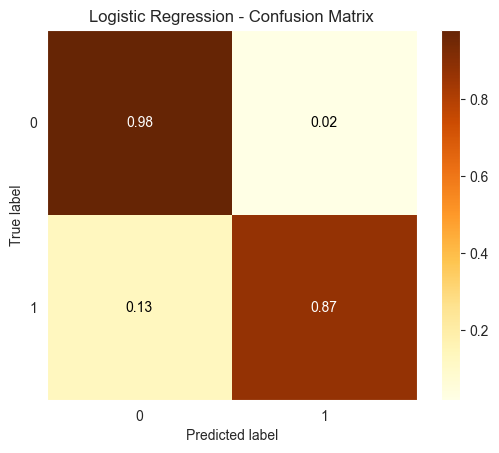

In [48]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr_smote, normalize=True, cmap = 'YlOrBr')
plt.title("Logistic Regression - Confusion Matrix");

In [49]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_lr_smote, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_lr_smote)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_lr_smote)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9750    0.9872     36250
           1     0.0573    0.8730    0.1075        63

    accuracy                         0.9749     36313
   macro avg     0.5285    0.9240    0.5474     36313
weighted avg     0.9981    0.9749    0.9857     36313

Acurácia: 0.9749

AUC: 0.9240



Avaliação do Modelo

In [50]:
# padronizar as colunas Time e Amount
std_scaler = StandardScaler()
test['std_amount'] = std_scaler.fit_transform(test['Amount'].values.reshape(-1, 1))
test['std_time'] = std_scaler.fit_transform(test['Time'].values.reshape(-1, 1))
test.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


In [51]:
# separar variáveis entre X e y
X_test = test.drop('Class', axis=1)
y_test = test['Class']

In [52]:
# tamanho dos dados de teste
test.shape

(42721, 31)

In [53]:
# balanceamento dos dados de teste
test.Class.value_counts()

Class
0    42647
1       74
Name: count, dtype: int64

In [54]:
# Under-sampling
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

# Over-sampling
y_pred_smote = clf_smote.predict(X_test)
y_prob_smote = clf_smote.predict_proba(X_test)

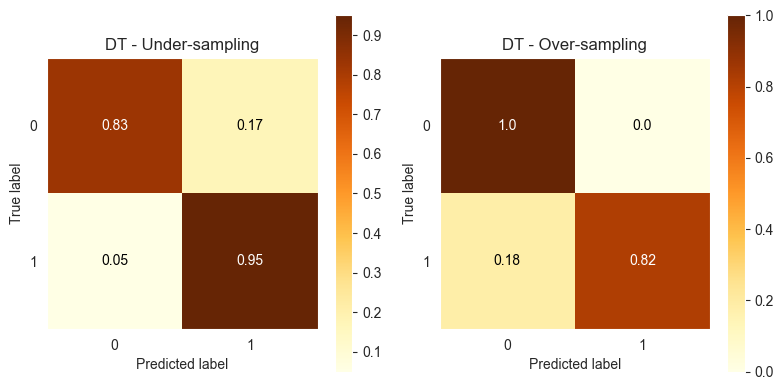

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, cmap = 'YlOrBr', ax = ax[0])
skplt.metrics.plot_confusion_matrix(y_test, y_pred_smote, normalize=True, cmap = 'YlOrBr', ax = ax[1])

ax[0].set_title("DT - Under-sampling")
ax[1].set_title("DT - Over-sampling")

plt.tight_layout();

In [56]:
# fazer as previsões em cima dos dados de teste
y_pred_lr = model.predict(X_test)
y_proba_lr = model.predict_proba(X_test)

# fazer as previsões em cima dos dados de teste
y_pred_lr_smote = model_smote.predict(X_test)
y_proba_lr_smote = model_smote.predict_proba(X_test)

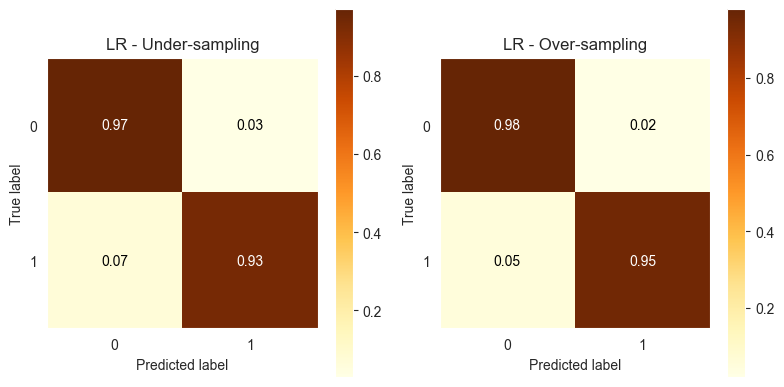

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr, normalize=True, cmap = 'YlOrBr', ax = ax[0])
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr_smote, normalize=True, cmap = 'YlOrBr', ax = ax[1])

ax[0].set_title("LR - Under-sampling")
ax[1].set_title("LR - Over-sampling")

plt.tight_layout();

In [58]:
# imprimir a área sob da curva
print("AUC LR - Under-sampling: {:.4f}\n".format(roc_auc_score(y_test, y_pred_lr)))
print("AUC LR - Over-sampling: {:.4f}\n".format(roc_auc_score(y_test, y_pred_lr_smote)))

AUC LR - Under-sampling: 0.9496

AUC LR - Over-sampling: 0.9608

